# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.8.0
    Uninstalling setuptools-59.8.0:
      Successfully uninstalled setuptools-59.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2022.2.0 which is incompatible.

### Setup Kaggle API Key

In [3]:
 #create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "FILL_IN_USERNAME"
kaggle_key = "FILL_IN_KEY"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username":'mohamedfathi07', "key": 'e51bf93d22a7a2d02e705e08649c8ef0'}))

### Download and explore dataset

In [5]:
# # Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
# !kaggle competitions download -c bike-sharing-demand
# # If you already downloaded it you can use the -o command to overwrite the file
# !unzip -o bike-sharing-demand.zip

In [6]:
import numpy as np
import pandas as pd
from autogluon.tabular import TabularPredictor

In [7]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv('/kaggle/input/bike-sharing-demand/sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:
predictor = TabularPredictor(label='count',eval_metric='root_mean_squared_error').fit(train_data = train.drop(['casual','registered'],axis=1), time_limit = 600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220801_095038/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220801_095038/"
AutoGluon Version:  0.5.2
Python Version:     3.7.12
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator..

### Review AutoGluon's training run with ranking of models that did the best.

In [12]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.767427      15.320621  565.317385                0.000819           0.294945            3       True         14
1   RandomForestMSE_BAG_L2  -53.091473      11.498624  414.199070                0.634855          26.134002            2       True         12
2          LightGBM_BAG_L2  -54.693543      11.078793  425.229351                0.215024          37.164283            2       True         11
3          CatBoost_BAG_L2  -55.588459      10.941733  430.935471                0.077964          42.870404            2       True         13
4        LightGBMXT_BAG_L2  -60.234861      14.391959  458.853751                3.528189          70.788683            2       True         10
5    KNeighborsDist_BAG_L1  -84.142866       0.059802    0.019987         

/opt/conda/lib/python3.7/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58154263993517,
  'KNeighborsDist_BAG_L1': -84.14286553455744,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

### Create predictions from test dataset

In [13]:
predictions = predictor.predict(test)
predictions.head()

0    23.050385
1    41.335953
2    45.886333
3    49.551914
4    52.485058
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [14]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.262886
std        89.278145
min         3.253396
25%        20.152914
50%        64.207603
75%       165.637192
max       359.810577
Name: count, dtype: float64

In [15]:
# How many negative values do we have?
predictions[predictions < 0].count()

0

In [16]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [17]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [18]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|████████████████████████████████████████| 188k/188k [00:01<00:00, 98.9kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [19]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2022-08-01 10:01:24  first raw submission               complete  1.79181      1.79181       
submission_new_hpo.csv       2022-07-29 22:34:23  new features with hyperparameters  complete  1.80550      1.80550       
submission_new_features.csv  2022-07-29 22:24:52  new features                       complete  0.69555      0.69555       
submission.csv               2022-07-29 22:13:44  first raw submission               complete  1.80550      1.80550       


#### Initial score of `1.78967`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [20]:
import matplotlib.pyplot as plt

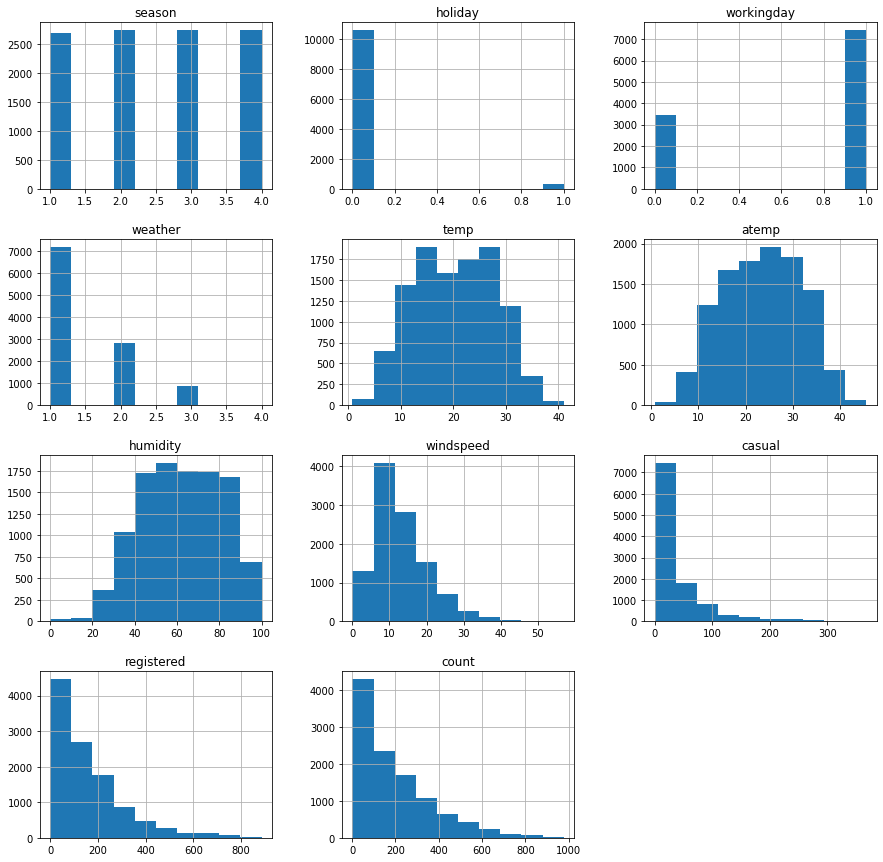

In [21]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
plt.rcParams["figure.figsize"] = (15,15)
train.hist();

In [22]:
# create a new feature
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
test['hour'] = pd.to_datetime(test['datetime']).dt.hour
train['month'] = pd.to_datetime(train['datetime']).dt.month
test['month'] = pd.to_datetime(test['datetime']).dt.month

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [23]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')
test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')

In [24]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1


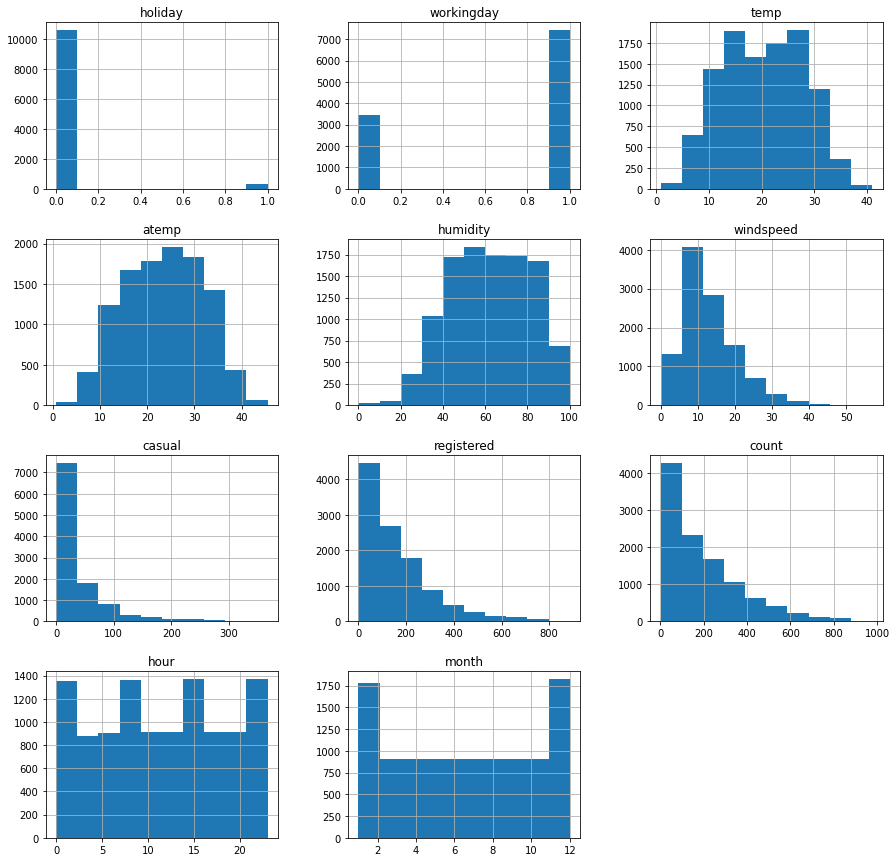

In [25]:
# View histogram of all features again now with the hour feature
plt.rcParams['figure.figsize'] = (15,15)
train.hist();

## Step 5: Rerun the model with the same settings as before, just with more features

In [26]:
predictor_new_features = TabularPredictor(label='count',eval_metric='root_mean_squared_error').fit(train_data = train.drop(['casual','registered'],axis=1), time_limit = 600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220801_100131/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220801_100131/"
AutoGluon Version:  0.5.2
Python Version:     3.7.12
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator.

In [27]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.253755      17.497217  570.599071                0.001271           0.294094            3       True         14
1          CatBoost_BAG_L2  -30.591312      15.409149  458.873475                0.116770          58.546566            2       True         13
2          LightGBM_BAG_L2  -30.613456      15.596214  438.288439                0.303834          37.961530            2       True         11
3        LightGBMXT_BAG_L2  -31.074901      16.435484  445.277678                1.143105          44.950768            2       True         10
4   RandomForestMSE_BAG_L2  -31.663318      15.932239  428.846113                0.639859          28.519204            2       True         12
5      WeightedEnsemble_L2  -32.227878      14.184414  361.140520         

/opt/conda/lib/python3.7/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58154263993517,
  'KNeighborsDist_BAG_L1': -84.14286553455744,
  'LightGBMXT_BAG_L1': -34.48177219869032,
  'LightGBM_BAG_L1': -33.917164270158686,
  'RandomForestMSE_BAG_L1': -38.41

In [28]:
# Remember to set all negative values to zero
prediction = predictor_new_features.predict(test)

In [29]:
prediction[prediction < 0].count()

0

In [30]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('/kaggle/input/bike-sharing-demand/sampleSubmission.csv')

In [31]:
# Same submitting predictions
submission_new_features["count"] = prediction
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [32]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|████████████████████████████████████████| 188k/188k [00:02<00:00, 68.1kB/s]
Successfully submitted to Bike Sharing Demand

In [33]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-08-01 10:12:24  new features                       complete  0.65929      0.65929       
submission.csv               2022-08-01 10:01:24  first raw submission               complete  1.79181      1.79181       
submission_new_hpo.csv       2022-07-29 22:34:23  new features with hyperparameters  complete  1.80550      1.80550       
submission_new_features.csv  2022-07-29 22:24:52  new features                       complete  0.69555      0.69555       


#### New Score of `0.67789`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [34]:
import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained


num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [35]:
predictor_new_hpo = TabularPredictor(label='count',eval_metric='root_mean_squared_error').fit(train_data= train.drop(['casual','registered'],axis=1),time_limit = 600, presets="best_quality",
                                                                                                hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20220801_101227/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220801_101227/"
AutoGluon Version:  0.5.2
Python Version:     3.7.12
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator.

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: LightGBM_BAG_L1/T1 ...
	-39.5016	 = Validation score   (-root_mean_squared_error)
	0.52s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-37.3314	 = Validation score   (-root_mean_squared_error)
	0.43s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-36.8153	 = Validation score   (-root_mean_squared_error)
	0.53s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T4 ...
	-121.3477	 = Validation score   (-root_mean_squared_error)
	0.42s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T5 ...
	-42.2975	 = Validation score   (-root_mean_squared_error)
	0.49s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 22.49s of the 597.0s of remaining time.
2022-08-01 10:12:31,264	WARNING tune.py:669 -- Tune detects GPUs, but no trials are using GPUs. To enable trial

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: LightGBM_BAG_L2/T1 ...
	-40.2671	 = Validation score   (-root_mean_squared_error)
	0.82s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-39.687	 = Validation score   (-root_mean_squared_error)
	0.55s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-40.3459	 = Validation score   (-root_mean_squared_error)
	0.75s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T4 ...
	-102.5682	 = Validation score   (-root_mean_squared_error)
	0.61s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T5 ...
	-40.7328	 = Validation score   (-root_mean_squared_error)
	0.69s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 13.21s of the 231.0s of remaining time.
2022-08-01 10:18:36,975	WARNING tune.py:669 -- Tune detects GPUs, but no trials are using GPUs. To enable trials

In [36]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3  -36.715017       3.209425  464.701185                0.000737           0.608230            3       True         18
1         LightGBM_BAG_L2/T2  -36.957929       2.187917  362.201766                0.132807          28.861479            2       True         12
2         LightGBM_BAG_L2/T3  -37.047726       2.200758  362.471632                0.145647          29.131345            2       True         13
3         LightGBM_BAG_L2/T1  -37.108146       2.191892  362.340611                0.136782          29.000325            2       True         11
4         LightGBM_BAG_L2/T5  -37.576281       2.203702  362.086661                0.148592          28.746374            2       True         15
5        WeightedEnsemble_L2  -38.096736       0.302540   54.8

/opt/conda/lib/python3.7/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1/T1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1/T2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1/T3': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1/T4': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L2/T1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L2/T2': 'Stac

In [37]:
# Remember to set all negative values to zero
prediction = predictor_new_hpo.predict(test)

In [38]:
prediction[prediction < 0].count()

0

In [39]:
submission_new_hpo = pd.read_csv('/kaggle/input/bike-sharing-demand/sampleSubmission.csv')

In [40]:
# Same submitting predictions
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [41]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|████████████████████████████████████████| 188k/188k [00:02<00:00, 84.1kB/s]
Successfully submitted to Bike Sharing Demand

In [42]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-08-01 10:22:54  new features with hyperparameters  complete  1.79181      1.79181       
submission_new_features.csv  2022-08-01 10:12:24  new features                       complete  0.65929      0.65929       
submission.csv               2022-08-01 10:01:24  first raw submission               complete  1.79181      1.79181       
submission_new_hpo.csv       2022-07-29 22:34:23  new features with hyperparameters  complete  1.80550      1.80550       


#### New Score of `1.78967`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

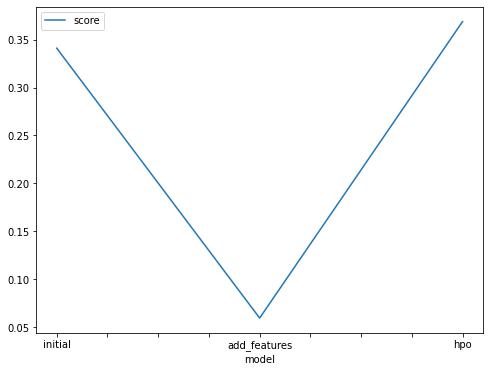

In [43]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [0.341084, 0.059503,  0.368854 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
#fig.savefig('model_train_score.png')

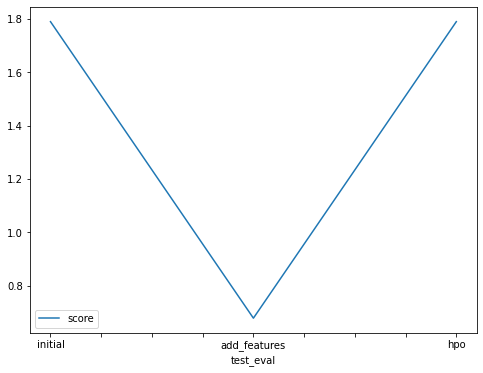

In [44]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.78967, 0.67789, 1.7896]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
#fig.savefig('model_test_score.png')

### Hyperparameter table

In [45]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "learning_rate": [0.3, 0.3, 5e-4],
    "num_leaves": [1, 1, 36],
    "dropout_prob": [50, 50, 0.1],
    "score": [1.78967, 0.67789, 1.7896]
})

,model,learning_rate,num_leaves,dropout_prob,score
0,initial,0.3000,1,50.0,1.78967
1,add_features,0.3000,1,50.0,0.67789
2,hpo,0.0005,36,0.1,1.78960


In [46]:
import seaborn as sns

In [47]:
train.iloc[:,:-1].corr()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,hour
holiday,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354
workingday,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780
temp,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430
atemp,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343
humidity,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011
windspeed,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631
casual,0.043799,-0.319111,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045
registered,-0.020956,0.119460,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540
count,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.400601
hour,-0.000354,0.002780,0.145430,0.140343,-0.278011,0.146631,0.302045,0.380540,0.400601,1.000000


In [48]:
import matplotlib.pyplot as plt

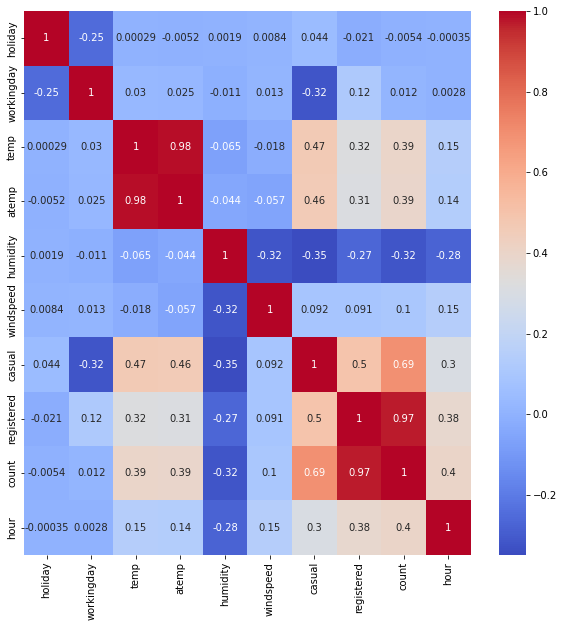

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(train.iloc[:,:-1].corr(),annot = True, fmt='.2g',cmap= 'coolwarm');